In [19]:
# Name: Maxwell Ahmadi
# Date: 04/25/2023
# Project: Deliverable_9
# Description: Regression and Classification Algorithm Project

In [18]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
california = pd.read_csv('/content/drive/MyDrive/california_housing.csv')
california.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
california

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [36]:
from sklearn.model_selection import train_test_split
features = california.columns.to_list()[:-1]
X = california[features] 
Y = california['median_income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

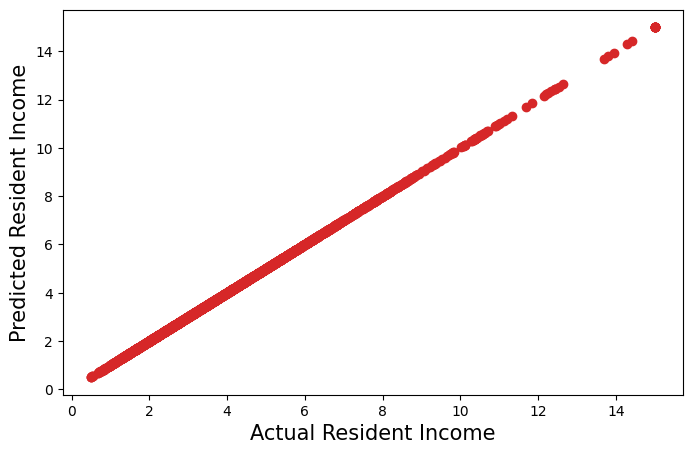

In [37]:
pred = my_linear_regression.predict(X_test)
pred
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:red')
plt.xlabel('Actual Resident Income', fontsize = 15)
plt.ylabel('Predicted Resident Income', fontsize = 15)
plt.show()

In [38]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))
print('Intercept = {}'.format(my_linear_regression.intercept_))
print('Coefficient 1 = {}'.format(my_linear_regression.coef_[1]))
print('Coefficient 2 = {}'.format(my_linear_regression.coef_[2]))
house_value_pred = my_linear_regression.predict(X_test)
house_value_pred
from sklearn import metrics
print('Mean Absolute Error = ', metrics.mean_absolute_error(Y_test, house_value_pred))
print('Mean Squared Erroe = ', metrics.mean_squared_error(Y_test, house_value_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(Y_test, house_value_pred)))
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)
print('Mean Absolute Percentage Error = ', MAPE(Y_test, house_value_pred)*100, "%")

R^2 = 1.0
Intercept = -7.37188088351104e-14
Coefficient 1 = -2.869205524211327e-16
Coefficient 2 = 2.7413988403824936e-16
Mean Absolute Error =  1.780554592656358e-14
Mean Squared Erroe =  9.1799444574612e-28
Root Mean Squared Error =  3.0298423156100384e-14
Mean Absolute Percentage Error =  5.532995030008808e-13 %


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(california)
df_norm = pd.DataFrame(data_norm, columns = california.columns.to_list())
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features]
Y = df_norm['median_income']
my_linear_regression.fit(X, Y)

LinearRegression()

In [48]:
sum = pd.DataFrame({'Features':features, 'Values':my_linear_regression.coef_})
sum

,Features,Values
0,longitude,3.261758e-16
1,latitude,3.191891e-16
2,housing_median_age,-3.215744e-16
3,total_rooms,8.212967e-16
4,total_bedrooms,-8.300516e-16
5,population,-6.366977e-17
6,households,2.306234e-16
7,median_income,1.000000e+00


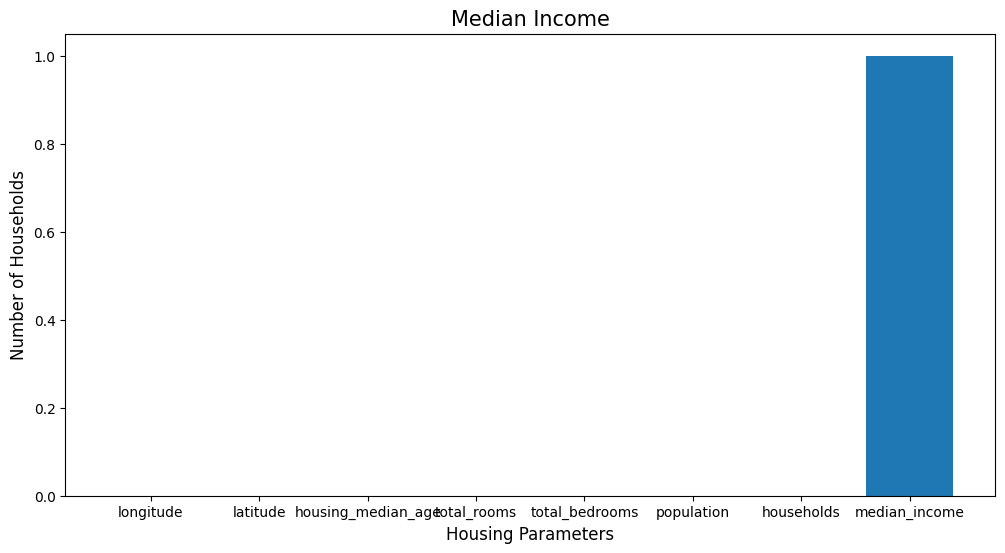

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.bar(x = sum['Features'], height = sum['Values'] , color = 'Tab:blue') 
plt.title('Median Income', fontsize = 15)
plt.xlabel('Housing Parameters', fontsize = 12)
plt.ylabel('Number of Households', fontsize = 12)
plt.show()